In [1]:
# coding: utf-8

import numpy as np
import torch
import os
import time

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline  

from networks import *
from network import CoordRegressionNetwork
from torch.utils.data import DataLoader
from dataset_factory import DatasetFactory, ROOT_DIR
import multiprocessing
from tqdm import tqdm

# gpu setting
os.environ["CUDA_VISIBLE_DEVICES"]="0"
torch.backends.cudnn.enabled = True
gpus = [0,1]
device = torch.device("cuda" if True else "cpu")
num_threads = multiprocessing.cpu_count()
print("GPU NUM: %d, Thread NUM: %d"%(torch.cuda.device_count(),num_threads))

%load_ext autoreload
%autoreload 1

GPU NUM: 1, Thread NUM: 20


In [2]:
# load pretrain model
modelpath = "./models/resnet18_224_wrap_best.t7"

if 'resnet18' in modelpath:
    modeltype = "resnet"
    net = CoordRegressionNetwork(n_locations=16, backbone="resnet18").to(device)
    inputsize = 224

train_dataset = DatasetFactory.get_train_dataset(modeltype, inputsize)
train_dataloader = DataLoader(train_dataset, batch_size=256,
                        shuffle=True, num_workers = num_threads)

test_dataset = DatasetFactory.get_test_dataset(modeltype, inputsize)
test_dataloader = DataLoader(test_dataset, batch_size=256,
                        shuffle=False, num_workers = num_threads)


  0%|          | 0/8 [00:00<?, ?it/s]/home/yuliang/.pyenv/versions/2.7.13/envs/env2.7/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/yuliang/.pyenv/versions/2.7.13/envs/env2.7/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/yuliang/.pyenv/versions/2.7.13/envs/env2.7/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/yuliang/.pyenv/versions/2.7.13/envs/env2.7/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', 

average forward seconds=1.206037 s| fps=0


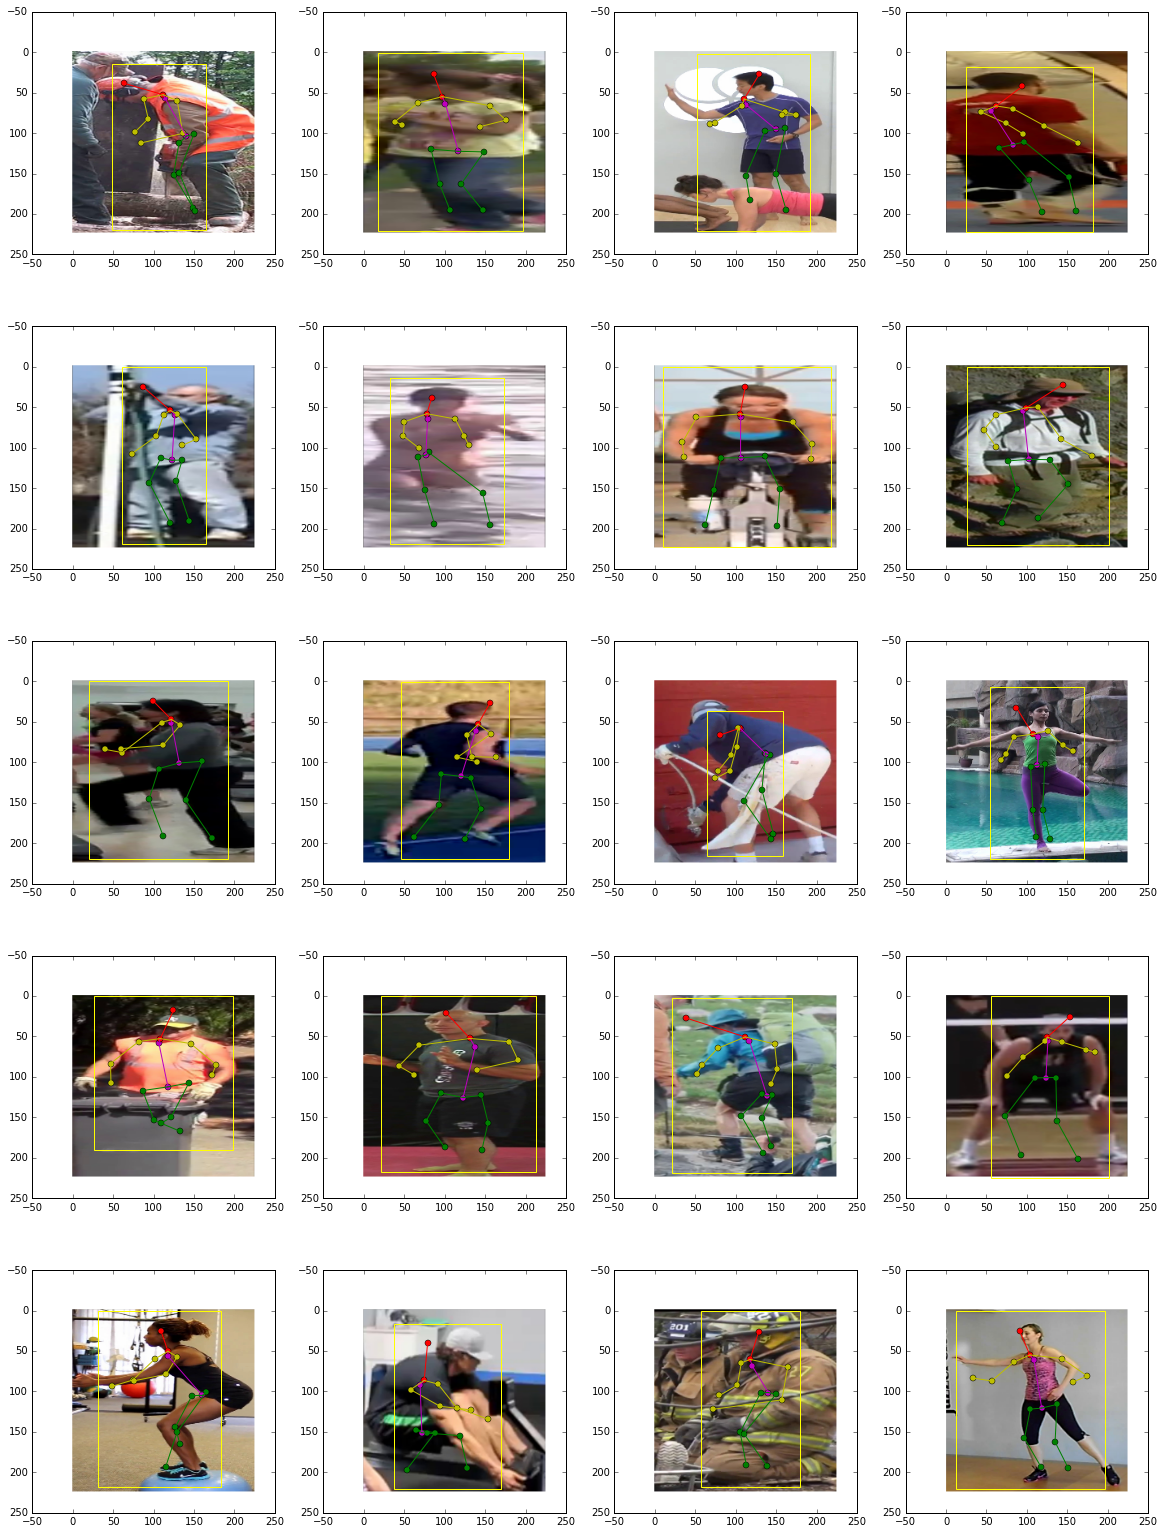

In [5]:
from dataloader import display_pose
plt.figure(figsize=(20,140))

with torch.no_grad():  
    net.load_state_dict(torch.load(modelpath))
    net = net.eval()

    for i_batch, sample_batched in enumerate(tqdm(test_dataloader)):

        images = sample_batched['image'].to(device)
        poses = sample_batched['pose'].to(device)
        
        t0 = time.clock()
        coords, heatmaps = net(images)
        t1 = time.clock()
        print('average forward seconds=%f s| fps=%d'%((t1-t0),int(1/((t1-t0)))))
        for ids in range(40,60):
            display_pose(images[ids][:3,:,:],coords[ids],ids)
#             display_pose(images[ids][:3,:,:],poses[ids],ids)
        
        plt.show()
        break

In [4]:
print(coords.shape, heatmaps.shape)

NameError: name 'coords' is not defined

In [ ]:
print(torch.max(coords))
print(torch.min(coords))

In [ ]:
plt.imshow(heatmaps[0, 6].data.cpu().numpy())
plt.show()

In [ ]:
from torchsummary import summary
import torch
from networks import *
import os
device = torch.device("cuda" if True else "cpu")
os.environ["CUDA_VISIBLE_DEVICES"]="1"

model = resnet.resnet34_ed().to(device)
# model = nn.Sequential(*(list(model.children())[:-1]))
summary(model, input_size=(3, 224, 224))
# print(list(model.children())[:-1])

In [ ]:
h, w =56, 56
x = np.arange(0, h)
y = np.arange(0, w)
x, y = np.meshgrid(x, y)
# declare guass
guass_heatmap = np.zeros([16, h, w])
xy_pose = np.random.uniform(0,1,size=(16,2))
sigma = 2.0/h

for idx,(x0,y0) in enumerate(xy_pose):
    guass_heatmap[idx] = np.exp(-((x*1.0/w-x0)**2+(y*1.0/h-y0)**2)/(2.0*sigma**2))
    
print(guass_heatmap.shape)
plt.imshow(guass_heatmap[1])



In [ ]:
print(np.random.uniform(0,1,size=(2,3)))

In [ ]:
print(np.max(guass_heatmap[0]))
print(np.min(guass_heatmap[0]))
print(guass_heatmap[0])
xy_pose

In [ ]:
print(xy_pose)